In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import os


In [ ]:
# Set dataset path
base_dir = '/content/drive/MyDrive/sugercane-dataset/dataset3'

# Image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32

# total number of classes to 13
# tomato 10 + cane 3
NUM_CLASSES = 3

# Epochs
EPOCHS = 10


In [ ]:


# Load training dataset with validation split
train_dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    shuffle=True,
    validation_split=0.2,
    subset='training',
    seed=123,
    color_mode='rgb'
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    shuffle=False,
    validation_split=0.2,
    subset='validation',
    seed=123,
    color_mode='rgb'
)

# Print class names to confirm
print("Class names:", train_dataset.class_names)


Found 876 files belonging to 3 classes.
Using 701 files for training.
Found 876 files belonging to 3 classes.
Using 175 files for validation.
Class names: ['Normal leaf', 'Red rot', 'White leaf']


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation

# Data augmentation pipeline
data_augmentation = Sequential([
    RandomFlip("horizontal"),          # Randomly flip images horizontally
    RandomRotation(0.1),               # Randomly rotate images by 10%
])


In [ ]:
# Load base model with pre-trained weights
base_model = EfficientNetB0(include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet')

# Freeze base model
base_model.trainable = False

# Build classification head
model = Sequential([
    data_augmentation,    # Add augmentation as the first layer
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Show model summary
model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', save_best_only=True)
]


In [12]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=EPOCHS,
    callbacks=callbacks
)


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 272s 12s/step - accuracy: 0.5211 - loss: 1.0182 - val_accuracy: 0.9943 - val_loss: 0.4694
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.8949 - loss: 0.5098 - val_accuracy: 1.0000 - val_loss: 0.2281
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.9760 - loss: 0.2474 - val_accuracy: 1.0000 - val_loss: 0.1256
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9758 - loss: 0.1690 - val_accuracy: 1.0000 - val_loss: 0.0835
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.9766 - loss: 0.1149 - val_accuracy: 1.0000 - val_loss: 0.0545
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9882 - loss: 0.0857 - val_accuracy: 1.0000 - val_loss: 0.0422
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9858 - loss: 0.0813 - val_accuracy: 1.0000 - val_loss: 0.0395
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9920 - loss: 0.0604 - val_accuracy: 1.0000 - val_lo

In [15]:
from tensorflow.keras.metrics import Precision, Recall

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])


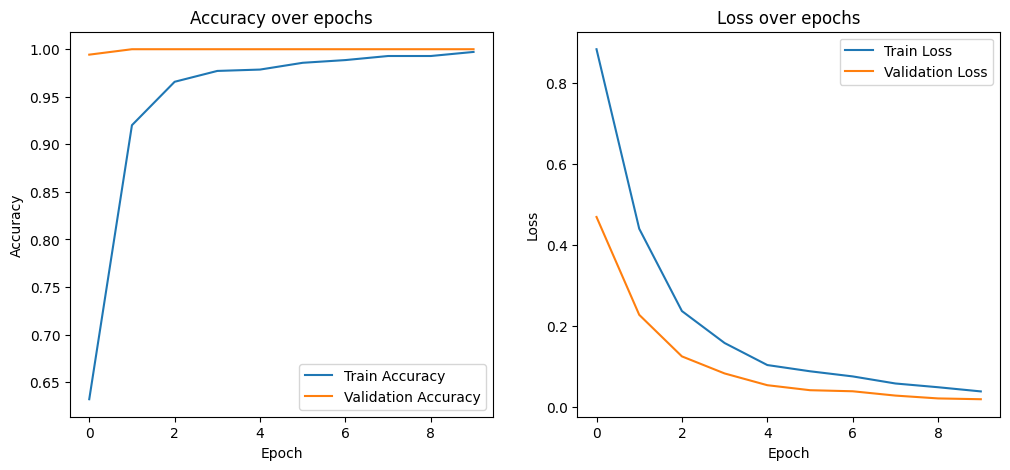

In [16]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [19]:
results = model.evaluate(validation_dataset)
val_loss = results[0]
val_accuracy = results[1] # Accuracy is typically the second metric

print(f"Validation Accuracy: {val_accuracy*100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 1.0000 - loss: 0.0160 - precision: 1.0000 - recall: 1.0000
Validation Accuracy: 100.00%


In [20]:
model.save('sugercane2.keras')


First, I will load the saved model.

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the saved model
model = load_model('/content/drive/MyDrive/Colab Notebooks/sugercane1.keras')

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Now, I will define a function to load and preprocess the image and then make a prediction.

In [ ]:
def predict_image(image_path, model, img_size=224):
    """
    Predicts the class of an image using the trained model.

    Args:
        image_path (str): Path to the image file.
        model (tf.keras.Model): Trained Keras model.
        img_size (int): The target size for the image (height and width).

    Returns:
        numpy.ndarray: Predicted probabilities for each class.
    """
    img = image.load_img(image_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch
    img_array /= 255.0  # Rescale pixel values

    predictions = model.predict(img_array)
    return predictions

Now you can use the `predict_image` function to predict the class of your image. Replace `'path/to/your/image.jpg'` with the actual path to your image file.

In [ ]:
# Example usage:
# Replace 'path/to/your/image.jpg' with the actual path to your image file
image_path = '/content/drive/MyDrive/sugercane-dataset/Dataset2/White leaf/102.jpeg'  # Replace with your image path
predictions = predict_image(image_path, model, IMG_SIZE)

# Print the predictions
print("Predictions:", predictions)

# To get the predicted class index and name
predicted_class_index = np.argmax(predictions, axis=1)[0]
class_names = ['Normal leaf', 'Red rot', 'White leaf'] # Make sure this matches the order from your training data
predicted_class_name = class_names[predicted_class_index]

print(f"Predicted class index: {predicted_class_index}")
print(f"Predicted class name: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Predictions: [[0.25589585 0.42013308 0.32397106]]
Predicted class index: 1
Predicted class name: Red rot
